In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [3]:
# Making data
X = torch.arange(0,1,0.02).unsqueeze(dim=1)

W = 0.3
B = 0.9
Y = (W*X)+B

# Splitting the data
split = int(0.8 * len(X))
train_X,train_Y,test_X,test_Y = X[:split],Y[:split],X[split:],Y[split:]


# LR model class
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.LL = nn.Linear(in_features=1,out_features=1)

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.LL(x)

torch.manual_seed(76)
LR = LinearRegression()
LR.state_dict()

# Loss and Optimiser function
loss_func = nn.L1Loss()
opti_func = torch.optim.SGD(params = LR.parameters(),lr=0.01)


# Training and predictions
epochs = 200

for epoch in range(epochs):
  LR.train()
  train_pred_Y = LR(train_X)
  train_loss = loss_func(train_pred_Y,train_Y)
  opti_func.zero_grad()
  train_loss.backward()
  opti_func.step()

  LR.eval()
  with torch.inference_mode():
    test_pred_Y = LR(test_X)
    test_loss = loss_func(test_pred_Y,test_Y)

  if epoch%10==0:
    print(f"E:{epoch},Train:{train_loss},Test:{test_loss}")

E:0,Train:0.7481050491333008,Test:0.8122061491012573
E:10,Train:0.6328950524330139,Test:0.6774961948394775
E:20,Train:0.517685055732727,Test:0.542786180973053
E:30,Train:0.40247517824172974,Test:0.40807634592056274
E:40,Train:0.2872653007507324,Test:0.2733665108680725
E:50,Train:0.1720554530620575,Test:0.13865667581558228
E:60,Train:0.056845568120479584,Test:0.005054485984146595
E:70,Train:0.017403878271579742,Test:0.039137233048677444
E:80,Train:0.013944330625236034,Test:0.03155172988772392
E:90,Train:0.01051374338567257,Test:0.023966217413544655
E:100,Train:0.007079495582729578,Test:0.015693867579102516
E:110,Train:0.0036406919825822115,Test:0.0074215056374669075
E:120,Train:0.002567476127296686,Test:0.008125925436615944
E:130,Train:0.002567476127296686,Test:0.008125925436615944
E:140,Train:0.002567476127296686,Test:0.008125925436615944
E:150,Train:0.002567476127296686,Test:0.008125925436615944
E:160,Train:0.002567476127296686,Test:0.008125925436615944
E:170,Train:0.00256747612729668

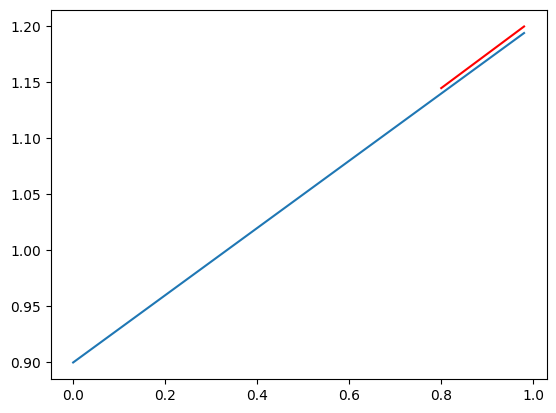

In [4]:
plt.plot(X,Y)
# plt.plot(test_X,test_Y)
plt.plot(test_X,test_pred_Y,color='red')